In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
!pip install -U textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 6.9 MB/s 
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 8.5 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer= SentimentIntensityAnalyzer()
sentence = "This is a VADER Example"
analyzer.polarity_scores(sentence)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
import pandas as pd
from numpy import nan
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

data = pd.read_csv("/drive/My Drive/Colab Notebooks/CCST Survey_20221109_Text_Answers.csv")
data=data['accessibility.feedback'].values
print(data)
#drop NA values in dataframe
data=[item for item in data if not(pd.isnull(item)) == True]
print(data)


[nan nan nan ... nan nan nan]
['Harder to find detailed information then in the past. Some of this because it is now on Answers.  Hard to get faculty information consistently across schools and colleges.  Especially telephone numbers, office numbers and mailing addresses.', 'I find syracuse.edu is usually not how I navigate, I usually google something specific then wind up on a syracuse.edu page.  Plus IMO syracuse.edu is more for marketing / new students / etc. Not employees / enrolled students. Coming from being a student for 7 years and a employee for 4.', 'There is no research button on the SU home page! This makes us look like we do not take research seriously.', 'Why is it so hard to find information on SU websites? Allowing every college to maintain its own website leads to inconsistency in finding basic contact information', 'Search function through the website is not always very helpful and accurate.. makes it difficult to find things quickly sometimes.', 'Overall, the informa

In [ ]:
scores =[]
sentences=[]

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
for sentence in data:
    score = analyser.polarity_scores(sentence)
    scores.append(score)
    sentences.append(sentence)
    
#Converting List of Dictionaries into Dataframe
dataFrame= pd.DataFrame(scores,sentences)

print(dataFrame)

print("Overall Sentiment Score for the multiple sentences :- ",dataFrame.mean())

                                                      neg    neu    pos  \
Harder to find detailed information then in the...  0.038  0.962  0.000   
I find syracuse.edu is usually not how I naviga...  0.000  1.000  0.000   
There is no research button on the SU home page...  0.090  0.734  0.176   
Why is it so hard to find information on SU web...  0.067  0.933  0.000   
Search function through the website is not alwa...  0.219  0.781  0.000   
...                                                   ...    ...    ...   
I have had patrons share frustrations with me a...  0.074  0.817  0.109   
The search function needs improvement.              0.000  0.571  0.429   
Don't use the syracuse.edu website much. Howeve...  0.000  1.000  0.000   
Department and college directories are difficul...  0.161  0.839  0.000   
One of the worst website experience is Answers....  0.279  0.721  0.000   

                                                    compound  
Harder to find detailed information 

In [ ]:
dataFrame['Max'] = dataFrame.idxmax(axis=1)

In [ ]:
dataFrame

neg    neu    pos  \
Harder to find detailed information then in the...  0.038  0.962  0.000   
I find syracuse.edu is usually not how I naviga...  0.000  1.000  0.000   
There is no research button on the SU home page...  0.090  0.734  0.176   
Why is it so hard to find information on SU web...  0.067  0.933  0.000   
Search function through the website is not alwa...  0.219  0.781  0.000   
...                                                   ...    ...    ...   
I have had patrons share frustrations with me a...  0.074  0.817  0.109   
The search function needs improvement.              0.000  0.571  0.429   
Don't use the syracuse.edu website much. Howeve...  0.000  1.000  0.000   
Department and college directories are difficul...  0.161  0.839  0.000   
One of the worst website experience is Answers....  0.279  0.721  0.000   

                                                    compound  Max  
Harder to find detailed information then in the...   -0.1027  neu  
I find syracuse.edu is usually not how I naviga...    0.0000  neu  
There is no research button on the SU home page...    0.2755  neu  
Why is it so hard to find information on SU web...   -0.2183  neu  
Search function through the website is not alwa...   -0.6185  neu  
...                                                      ...  ...  
I have had patrons share frustrations with me a...    0.1027  neu  
The search function needs improvement.                0.4588  neu  
Don't use the syracuse.edu website much. Howeve...    0.0000  neu  
Department and college directories are difficul...   -0.3612  neu  
One of the worst website experience is Answers....   -0.6997  neu  

[326 rows x 5 columns]

In [ ]:
dataFrame.to_csv('accessvader.csv', index=True)  

In [ ]:
corpus = dataFrame['Max'].tolist()
klist=['pos','neu','neg','compound']

In [ ]:
#find the frequency of each word in the document in all non-overlapping matchs of pattern 
import numpy as np
freq={}
for word in corpus:
    count=freq.get(word,0)
    freq[word]=count + 1
    
#store all words in frequency_list    
frequency_list = freq.keys()
frequency_list

dict_keys(['neu', 'compound', 'neg', 'pos'])

In [ ]:
#set a column to store the words and their frequency
results = []

#if the people word appears in the document, record this word and its frequency from the document 
for words in frequency_list:
    if words in klist:
            #store the (word, frequency) in a tuple
            tuple = (words, freq[words])
            results.append(tuple)
            #print the people words' frequency
            print(words + '   ' + str(freq[words]))  

neu   310
compound   12
neg   2
pos   2


In [ ]:
#descending order of frequency
byFreq=sorted(results, key=lambda word: word[1], reverse=True)

# store the top 20 results in two lists
words_names=[]
words_count=[]
for (word, freq) in byFreq:
    print (word, freq)
    words_names.append(word)
    words_count.append(freq)

neu 310
compound 12
neg 2
pos 2


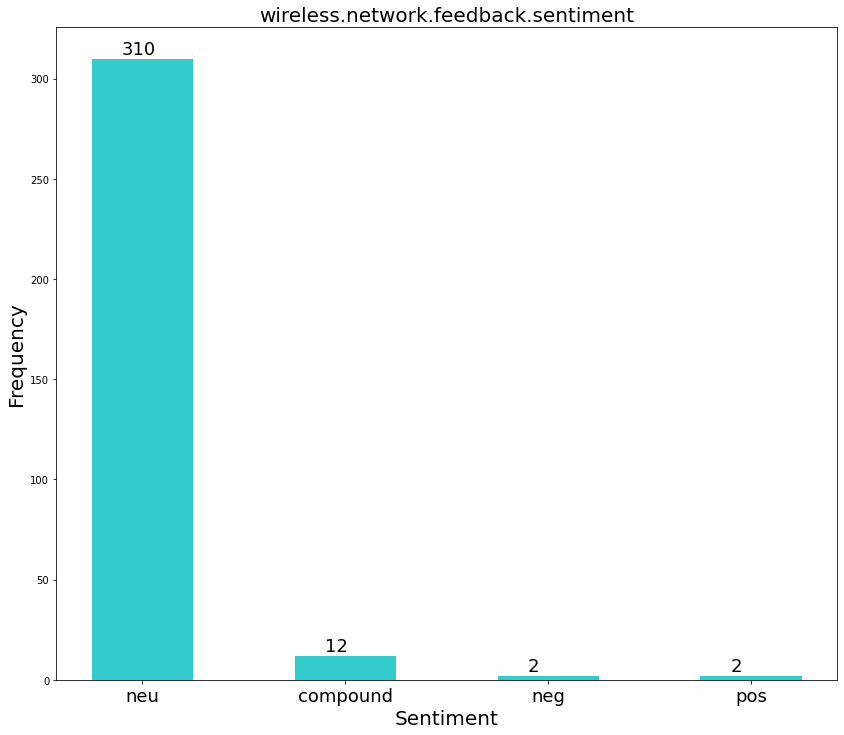

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot histogram using matplotlib bar
#plt.figure(figsize=(20,15))
#plt.xlabel('Scale of Satisfication')
##plt.ylabel('Frequency')
#plt.title('Plotting Satisfication Frequency')
#indexes = np.arange(len(words_names))
#width = 0.5
#plt.bar(indexes, words_count, width)
#plt.xticks(indexes + width * 0.5, words_names)
#plt.legend()
#plt.tight_layout()
#plt.show()
plt.figure(figsize=(14,12))
plt.xlabel('Sentiment',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.title('wireless.network.feedback.sentiment',fontsize=20)
indexes=np.arange(len(words_names))
width=0.5
plt.bar(indexes,words_count,width,align='edge',color='c', alpha=0.8)
plt.xticks(indexes+width*0.5,words_names,fontsize=18)
for a,b in zip(indexes,words_count):
  plt.text(a+0.15,b+0.05,'%.0f'%b,ha='left',va='bottom',fontsize=18)
plt.show()